### <span style="color:#4f6da9">Ручной подбор</span> <span style="color:#0bb79a">пересечения графиков</span> 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def simple_search(func1, func2, *arg):
    """Поиск решения func1=func2 умным подбором"""
    bot, top, tol, topside = arg
    while (bot - top > tol):
        mid = (top + bot) / 2
        cond = (func1(mid) - func2(mid, topside)) * (func1(top) - func2(top, topside)) > 0
        top, bot = (mid, bot) if cond else (top, mid)
    return (top + bot) / 2

def func_circle(x: float, topside: bool):
    anw = np.sqrt(abs(1 - x*x))
    return anw * (2 * int(topside) - 1)

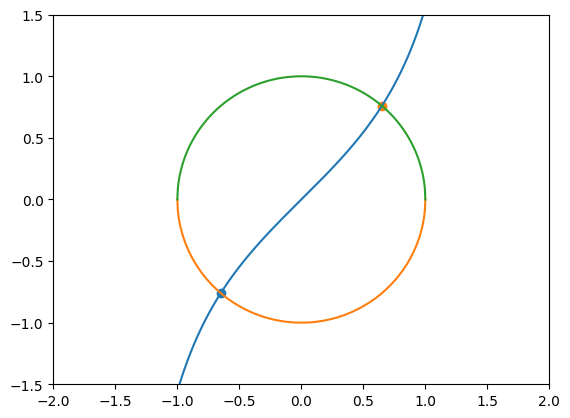

In [3]:
# Гиперпараметры
delta, N = (1e-4, 500)

# Поиск решений
anw = [simple_search(np.tan, func_circle, 0.75, -0.75, delta, bool(i)) for i in range(2)]

# Отрисовка
x = np.linspace(-1, 1, N)
plt.plot(x, [np.tan(x[i]) for i in range(N)])
for j in range(2):
    plt.plot(x, [func_circle(x[i], int(j)) for i in range(N)])
    plt.scatter (anw[j], np.tan(anw[j]))
plt.axis([-2, 2, -1.5, 1.5])
plt.show()